#CodSoft Internship
##Task : 2 - Customer Churn Prediction ML
## Author : Rajarshi Ray

#About Dataset

| Column Name   | Meaning                                       |
|---------------|-----------------------------------------------|
| RowNumber     | Row Number of dataset                        |
| CustomerId    | Unique identifier for each customer          |
| Surname       | Surname of the customer                      |
| CreditScore   | Credit Score of customer                     |
| Geography     | Location of customer                          |
| Gender        | Gender of customer (Male or Female)           |
| Age           | Age of the customer                           |
| Tenure        | Number of years the customer has been with the bank |
| Balance       | Average balance of the customer               |
| NumOfProducts | Number of bank product facilities customer is using |


## Importing libraries for dataset operations

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import dataset

df = pd.read_csv('./Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.columns  # column names

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.describe()  # statistical information

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()   # dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum() # check null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
## Exited : Target column which predicts the customer churn
## 0 --> Not exited & 1 --> Exited

df['Exited'].value_counts()  # Target types

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
# Dataset cleaning

df = df.drop(['RowNumber','CustomerId','Surname'],axis='columns')   # Dropping unnecessary columns
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes  # Datatypes of all columns of new dataset

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# Operations on categorical datas - Geography , Gender

df['Geography'].value_counts()  # All the places names

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
len(df['Geography'].unique())

3

In [ ]:
## Assigning numbers to places to convert to numerical data
geography_assign = {
    'France' : 0,
    'Germany' : 1,
    'Spain' : 2
    }

## Mapping this dictionary to Geography column

df['Geography'] = df['Geography'].map(geography_assign)

In [ ]:
## Assigning numbers to gender column to convert to numerical data
gender_assign = {
    'Female' : 0,
    'Male' : 1
    }

## Mapping this dictionary to Gender column

df['Gender'] = df['Gender'].map(gender_assign)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Checking counts of Tenure , Number of products

df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [ ]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

## Exploratory Data Analysis



1.   Countplots
2.   Boxplots



In [ ]:
# Exploratory Data Analysis

## Countplots

def countplot_generate(features):
    sns.countplot(x=df[features],hue=df['Exited'])
    plt.xlabel(f'{features}')
    plt.ylabel('Count')
    plt.title(f'Count of {features} on Churn level')
    if len(df[features].unique()) == 2:
      plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Specify custom labels
    elif features == 'Geography':
      plt.xticks(ticks=[0, 1,2], labels=['France', 'Germany' , 'Spain'])  # Specify custom labels
    plt.legend(title='Customer Churn', labels=['No', 'Yes'])  # Specify legend labels
    plt.show()

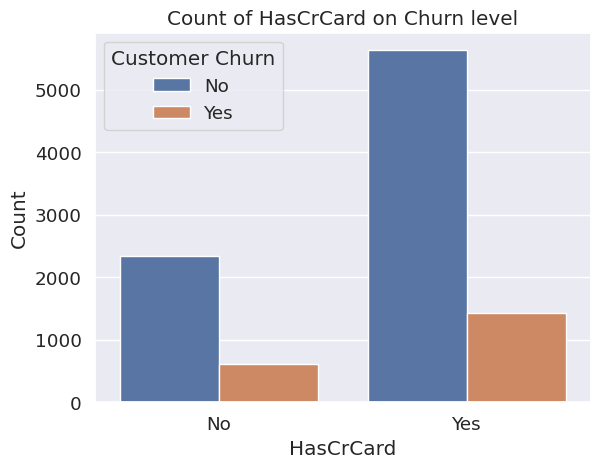

In [ ]:
countplot_generate('HasCrCard')

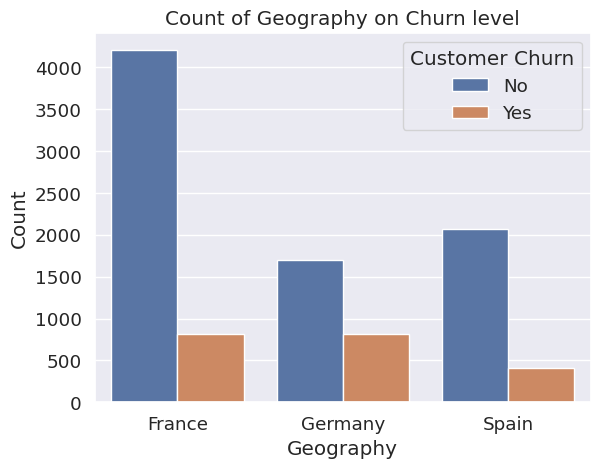

In [ ]:
countplot_generate('Geography')

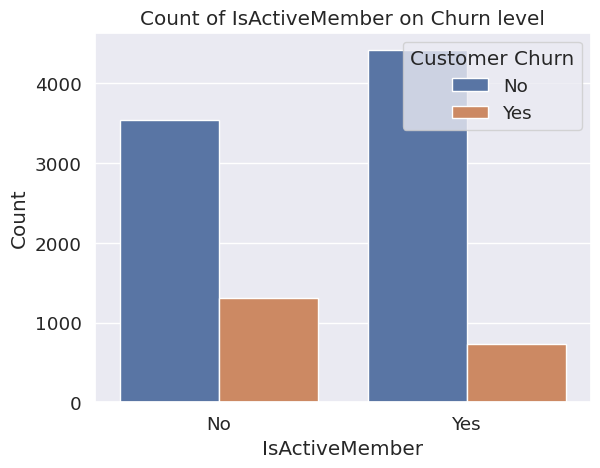

In [ ]:
countplot_generate('IsActiveMember')

In [ ]:
# Boxplots

def boxplot_generate(feature):
  sns.boxplot(x=df['Exited'],y=df[feature],data=df)
  plt.xlabel("Customer Churn (Left)")
  plt.ylabel(f"{feature}")
  plt.title(f"Distribution of Customer Churn on {feature}")
  plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Specify custom labels
  plt.show()

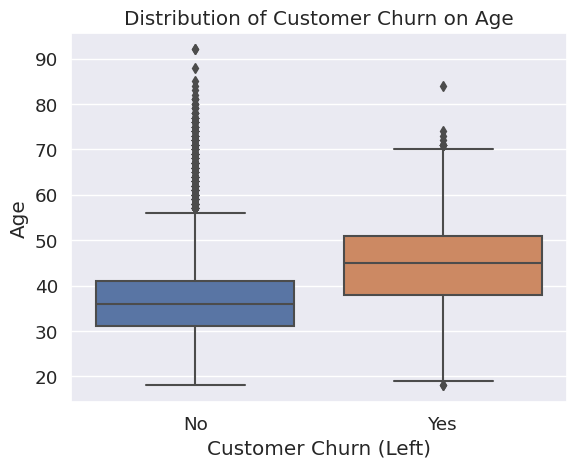

In [ ]:
boxplot_generate('Age')

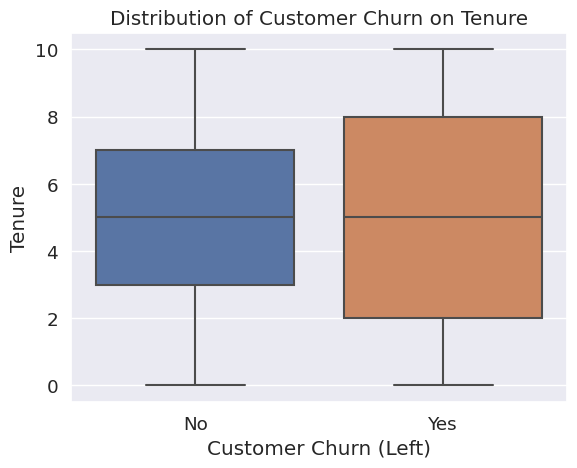

In [ ]:
boxplot_generate('Tenure')

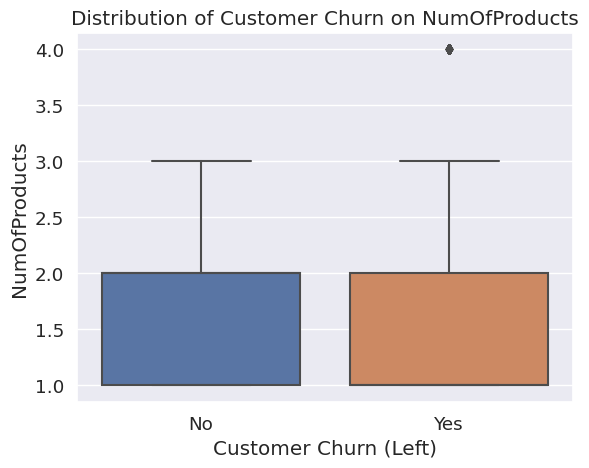

In [ ]:
boxplot_generate('NumOfProducts')

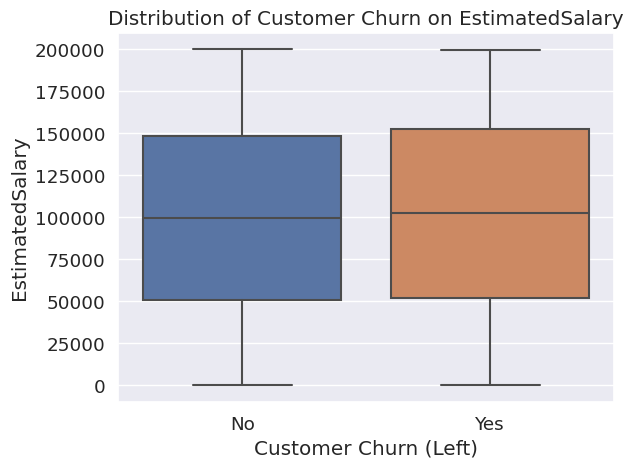

In [ ]:
boxplot_generate('EstimatedSalary')

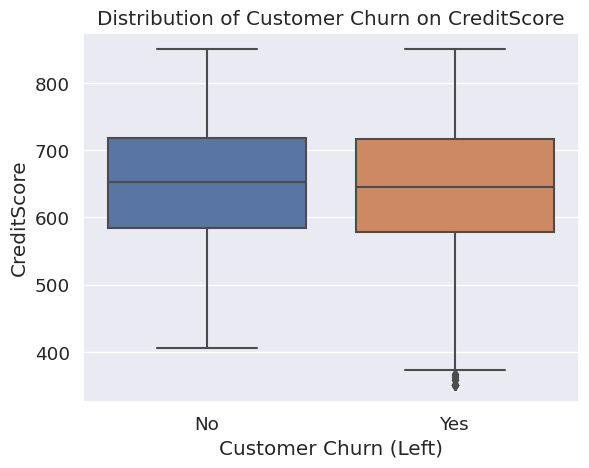

In [ ]:
boxplot_generate('CreditScore')

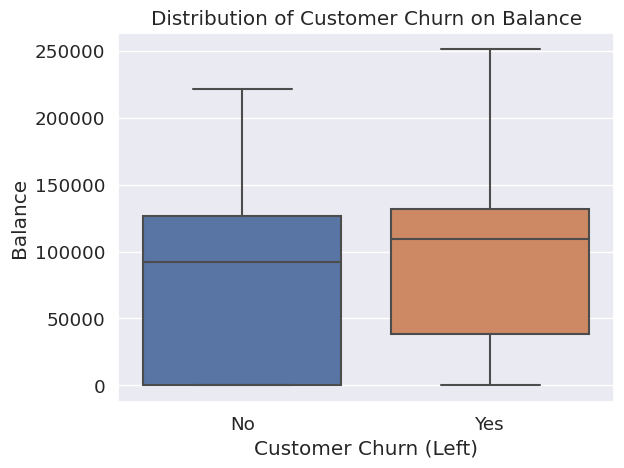

In [ ]:
boxplot_generate('Balance')

##Model training


1.   Logistic Regression
2.   Random Forest Classifier
3.   XGBoost
4.   SVM



In [ ]:
# install xgboost

!pip install xgboost

In [ ]:
# Importing all ML Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating X and y

X = df.drop(['Exited'],axis='columns')
y = df.Exited

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
X.shape,y.shape

((10000, 10), (10000,))

In [ ]:
# Scaling the X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [ ]:
# Train Test split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify = y, random_state=2)

In [ ]:
# Model List

models = [LogisticRegression(max_iter=1000),SVC(kernel='rbf'),RandomForestClassifier(n_estimators=1000),XGBClassifier(n_estimators=100, max_depth=2, learning_rate=1, objective='binary:logistic')]

In [ ]:
# Training

best_model = None
best_score = 0.0

for model in models:
  model.fit(X_train,y_train)
  predict_data = model.predict(X_test)
  accuracy_level = accuracy_score(y_test,predict_data)

  if accuracy_level > best_score:
    best_score = accuracy_level
    best_model = model

  print(f"Model used for classification is --> {model} & the accuracy score is --> {round(accuracy_level*100,2)}%")
  print("------------------------")

# Finalising the perfect model

print()
print(f"Model with the highest score --> {best_model}")
print(f"Highest score --> {round(best_score*100,2)}%")

Model used for classification is --> LogisticRegression(max_iter=1000) & the accuracy score is --> 80.36%
------------------------
Model used for classification is --> SVC() & the accuracy score is --> 85.68%
------------------------
Model used for classification is --> RandomForestClassifier(n_estimators=1000) & the accuracy score is --> 86.28%
------------------------
Model used for classification is --> XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing

##Accuracy Metrics Visualisation


1.   Confusion Matrix
2.   Classification Report



In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

In [ ]:
matrix = confusion_matrix(y_test,predict_data)
matrix

array([[1902,   89],
       [ 270,  239]])

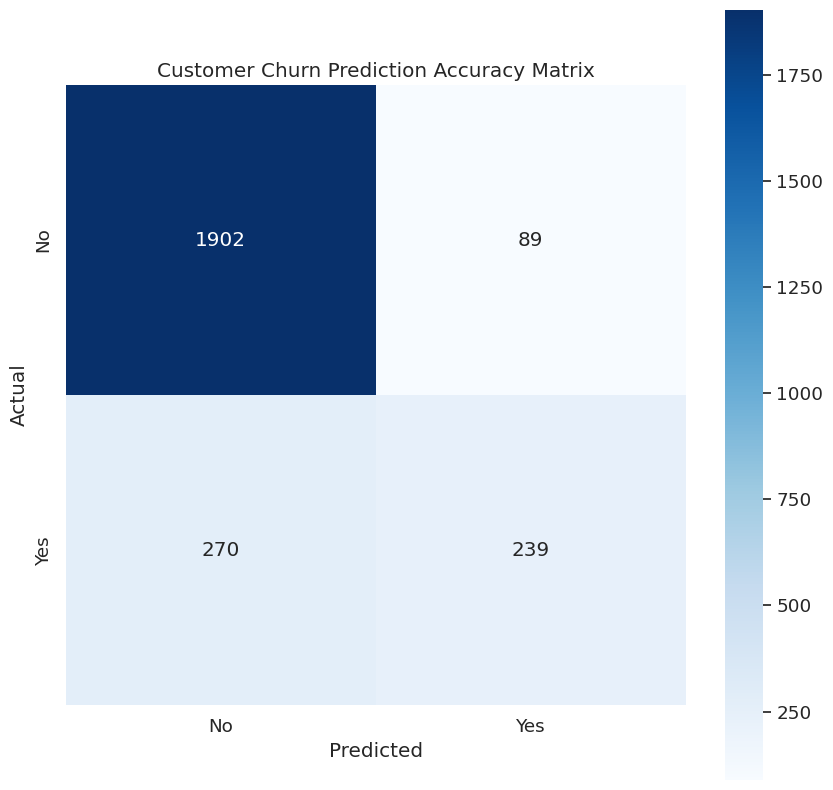

In [ ]:

plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=True, square=True,
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Customer Churn Prediction Accuracy Matrix")
plt.show()


In [ ]:
# Classification Report

from sklearn.metrics import classification_report

In [ ]:
clf_report = classification_report(y_test,predict_data)
print(clf_report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1991
           1       0.73      0.47      0.57       509

    accuracy                           0.86      2500
   macro avg       0.80      0.71      0.74      2500
weighted avg       0.85      0.86      0.84      2500

